# Days-before-start-point grid search

This notebook summarizes **average absolute percentage change** (between sequential years) for different values of `days_bef_start_point` per company.

Artifacts written by the source notebook:

- `artifacts/avg_abs_pct_change_long.csv` (tidy/long)
- `artifacts/avg_abs_pct_change_wide.csv` (wide: days × company)


In [ ]:
import pandas as pd
import numpy as np

long = pd.read_csv('artifacts/avg_abs_pct_change_long.csv')
wide = pd.read_csv('artifacts/avg_abs_pct_change_wide.csv')

print('long:', long.shape)
print('wide:', wide.shape)


In [ ]:
# Preview: wide table (days_bef_start_point as first column)
wide.head(20)


In [ ]:
# Per-company tables (days vs metric)
companies = sorted(long['company'].unique())
tables = {}
for c in companies:
    t = (long.loc[long['company']==c, ['days_bef_start_point','avg_abs_pct_change']]
           .sort_values('days_bef_start_point')
           .reset_index(drop=True))
    tables[c] = t

companies, {k: v.shape for k,v in tables.items()}


In [ ]:
# Show each company's table
for c, t in tables.items():
    display(pd.DataFrame({'company':[c]}))
    display(t)


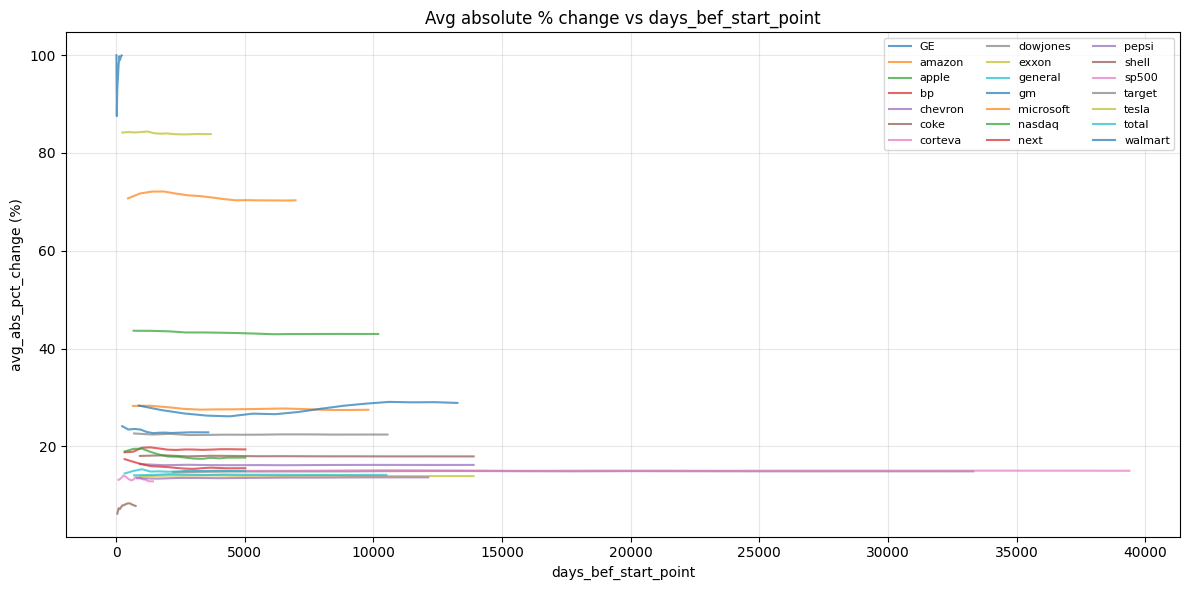

In [5]:
# Optional: quick visualization (lower is better)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for c in companies:
    t = tables[c].dropna()
    if len(t) == 0: 
        continue
    plt.plot(t['days_bef_start_point'], t['avg_abs_pct_change'], label=c, alpha=0.7)
plt.xlabel('days_bef_start_point')
plt.ylabel('avg_abs_pct_change (%)')
plt.title('Avg absolute % change vs days_bef_start_point')
plt.legend(ncol=3, fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
